# Assignment 3: Relations, and Functions

*If something is unclear or does not make sense, make a note and ask the lecturer, a TA in the exercise session, or a friend!*

### Homework Exercises

Solutions to the following exercises are to be handed in for peer grading, either typed or handwritten. Write neatly and concisely, so the solutions are easy to read. You are allowed (even encouraged) to work in groups, but solutions have to be written and handed in individually. If you worked in groups, please state on your answer sheet who you worked with. 

1. Let $A$ be the family $\{\{a\}, \{b, c\}, \{b, d\}, \{a, e\}, \{e, f\}\}$ and let $B$ be the family $\{\{a, b\}, \{b, c, d\}, \{e, f\}\}$. Let $R$ be the "is subset of" relation on $A \times B$: $XRY \iff X\subseteq Y$. 

    (a) Draw the graph of the relation $R$ on $A$ and $B$.

    (b) Determine whether the following properties hold for $R$. Motivate your answers.

    1. $R$ is a function 

    2. $R$ is surjective 

    3. $R$ is injective 

    4. $R$ is total 

    5. $R$ bijective 
        

    (c) Do the same for the relation $R^{-1}$.

2. All functions in this assignment are to be thought of as total. Let $A$ and $B$ be sets where $A$ has $n$ elements and $B$ has $m$ elements.
    
    (a) How many functions $A \to B$ are there?

    (b) How many injective functions $A \to B$ are there?

    (c) How many surjective functions $A \to B$ are there?

    (d) When does there exist a bijective function $A \to B$?

    (e) How many bijections $A \to B$ are there?

    (f) If a function $f: A \to B$ is surjective, is it injective?

    (g) If a function $f: A \to A$ is surjective, is it injective? 


### Programming Exercise: the Cantor–Schröder–Bernstein theorem

In this exercise we will explore a famous theorem of Cantor, Schröder and Bernstein about bijective functions. The statement looks surprisingly inoffensive, but turns out to be trickier than it seems.

---
**Theorem** (Cantor–Schröder–Bernstein)
Suppose $A$ and $B$ are sets and there are two functions $f : A \to B$ and $g : B \to A$ such that both $f$ and $g$ are injective. Then, there exists a bijection $h : A \to B$.

---

The theorem claims that if I can send all the elements from $A$ to distinct elements of $B$ and vice versa, then I must be able to exactly match the elements of both sets.

**Task 1**: Pause and ponder for a second; does the statement make sense to you? Does it seem true?

In order to convince ourselves of the statement, let us look at the case when $A$ and $B$ are both *finite* sets. Say, $A$ has $n \in \mathbb{N}$ elements and $B$ has $m \in \mathbb{N}$ elements.

**Task 2**: Recall the assumptions of the theorem: there are two injections, one from $A$ to $B$ and one from $B$ to $A$. What can you say about $n$ and $m$? Is $n \leq m$? Or $m \leq n$? Or perhaps $n = m$? Why?

**Task 3**: Did you conclude $n = m$? That's right, $A$ and $B$ must have the same number of elements. Argue that in this case the theorem holds: you can define a bijection from $A$ to $B$.

*Hint*: You don't need to define a new function; it suffices to argue that $f : A \to B$ itself is already a bijection.

We have just seen that the theorem holds whenever $A$ and $B$ are finite. However, if $A$ and $B$ are infinite sets, things are not as easy any more. Let us consider the following two functions $f$ and $g$ taking real-valued inputs and having real-valued outputs:

\begin{align*}
  f \colon [0,1] &\to [0,1) \\
  x &\mapsto x/2.
\end{align*}

and

\begin{align*}
  g \colon [0,1) &\to [0,1] \\
  y &\mapsto y.
\end{align*}

Pay attention to the domains of these two functions (these will be our sets $A$ and $B$), and note that they are *not* the same. Is it clear to you that both functions are injective?

**Task 4**: Write two simple Python functions $\mathsf{f(x)}$ and $\mathsf{g(y)}$ computing these functions. Make sure that the functions are only defined on the right inputs; for all other inputs, output a message saying "The function is not defined on this input".

In [ ]:
def f(x):
    if x>1 or x<0:
        print ("the function is not defined for this output")
    else:
        return x/2


def g(y):
    if y<0 or y>=1:
        print ("the function is not defined for this output")
    else:
        return y 

Both $f$ and $g$ are injective, but are they also surjective?

**Task 5**: Give a value $y \in [0,1)$ that is not in the range of $f$ and a value $x \in [0,1]$ not in the range of $g$.

From now on, we will say that a point $y$ that is *not* in the range of $f$ is called *LONELY*. 

**Task 6**: We can give a better characterization of the elements that are lonely! That is, the set $[0,1) \setminus \operatorname{rng} f$ of lonely points is the same as $\{ y \in [0, 1) \mid y > a\}$ for some number $a \in [0,1]$. What is this number? Write a Python function $\mathsf{is\_lonely(y)}$ that checks whether $y$ is lonely, using the characterization above.

In [4]:
def is_lonely(y):
    if y>0.5:
        return True
    else:
        return False


print(is_lonely(0.9))
print(is_lonely(0.5))
print(is_lonely(0.2))

# You should get True, False, False

True
False
False


So $f$ and $g$ are both injective but, unlike in the finite case, these are not themselves bijective! In fact, it seems hard at first glance to build a bijection between $[0,1]$ and $[0, 1)$... where would we map $1$ to?

**Task 7**: Try to come up with another function $f' : [0,1] \to [0, 1)$ that is actually bijective. If this seems hard, it's okay... think about it for a bit and move on if you can't find one. We'll eventually come up with such a function.

In a surprising move, Cantor, Schröder and Bernstein came up with a generic recipe that, given $f$ and $g$ injective, constructs a bijection $h$. And it always works!

Before we state the recipe, recall that a point $y$ is called *lonely* if $y$ is not in the range of $f$. Furthermore, we will say that $y_1$ is the *DESCENDANT* of $y_2$ if we can get $y_1$ by applying $f \circ g$ to $y_2$ a finite number of times. That is, for example, if $f(g(f(g(f(g(y_2)))))) = y_1$. A concise way to write this is that $y_1 = (f \circ g)^n (y_2)$ for some $n \in \mathbb{N}$.

The picture below illustrates what it means to have such a situation. On the left, we have two abstract sets $A$ and $B$, with $y_1$ a descendant of a lonely point $y_2$. On the right, the situation for $f(x) = x/2$ and $g(y) = y$ between the sets $A = [0,1]$ and $B = [0, 1)$.

![alt text](pic.png)


The Cantor-Schröder-Bernstein recipe is as follows:

\begin{equation*}
h(x) = \begin{cases}
    g^{-1}(x) &\text{ if }f(x)\text{ is the descendant of a lonely point} \\
    f(x) &\text{ otherwise}
\end{cases}  .
\end{equation*}

We will not prove that this is correct in general, but if you'd like to see a proof, [here is one](https://artofproblemsolving.com/wiki/index.php/Schroeder-Bernstein_Theorem?srsltid=AfmBOooKugZUb95aRXL7nNeyvJt_ZRAcumWIfjJ17wTr3YojUu9RFSn-) (and quite short!).

**Task 8**: Recall that our $g$ is $g(y) = y$. What is the inverse of $g^{-1}(x)$ of $g$? Write a Python function $\mathsf{g\_inv}(x)$ that computes it. Make sure to exclude those points where it is not well-defined by outputting an error message.

In [5]:
def g_inv(y):
    if y<0 or y>=1:
        print("undefined")
    else:
        return y 

We have Python functions that compute $f$, $g$, $g^{-1}$ and that check whether $y$ is a lonely point. To complete the recipe, we need to be able to check whether a point $y$ is the descendant of a lonely point.

**Task 9**: Write a Python program that checks whether $y \in [0, 1)$ is the descendant of a lonely point with respect to our $f$.

*Hint*: Think about the specific definitions of $f$ and $g$. Recall the characterization that $y$ is lonely if and only if $0.5 < y < 1$. You want to start from $y$ and apply the inverse of $f$ a few times until you get into the lonely area (and halt if you overshoot).

In [6]:
def descendant_of_lonely(y):
    if y==0:
        return False
    while y <= 0.5:
        y*=2
    if y<1:
        return True
    else:
        return False

print(descendant_of_lonely(1.0))
print(descendant_of_lonely(0.75))
print(descendant_of_lonely(0.5))
print(descendant_of_lonely(0.499999))
print(descendant_of_lonely(0.25))
print(descendant_of_lonely(0.0))

# Output should be False, True, False, True, False, False


False
True
False
True
False
False


We have all the ingredients ready!

**Task 10**: Write a Python function $\mathsf{h(x)}$ that computes $h(x)$ according to the Cantor-Schröder-Bernstein recipe.

In [7]:
def h(x):
    if descendant_of_lonely(x):
       return g_inv(x) 
    else:
        return f(x)

print(h(0.0))
print(h(1.0))
print(h(0.5))
print(h(0.25))
print(h(0.333))
print(h(0.76))


0.0
0.5
0.25
0.125
0.333
0.76


Now that we are able to compute the values of $f(x)$, $g(y)$ and $h(x)$ using our functions, we can easily plot them. The following piece of code will generate two plots. Run it, you don't have to modify anything and you don't need to understand what the different plotting functions do.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

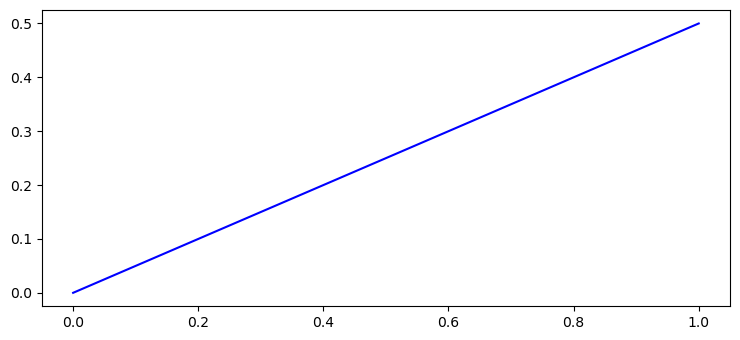

In [8]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(0.0, 0.999999999, 1000)
y = np.linspace(0.0, 0.999999999, 1000)
x2 = np.array([1 / (2**i) for i in range(100)])
y2 = np.array([1 / (2**i) for i in range(1, 100)])


plt.plot(x, np.array([f(i) for i in x]), color="blue", label="f(x)")
plt.plot(np.array([g(i) for i in y]), y, color="green", label="g(y)")

plt.legend()
plt.show()

plt.plot(x, np.array([f(i) for i in x]), color="blue", label="f(x)")
plt.plot(np.array([g(i) for i in y]), y, color="green", label="g(y)")
plt.plot(x, np.array([h(i) for i in x]), color="red", label="h(x)")

plt.plot(x2, np.array([h(i) for i in x2]), ".", color="red")
plt.plot(y2, np.array([g(i) for i in y2]), ".", color="green")

plt.legend()

plt.show()

In case the previous code did not run, these are the figures you should have gotten. If the plots did render but they don't look like the pictures below, try to see what you did wrong and correct it!

![alt text](fg.png)

![alt text](fgh.png)

**Task 10**: In the first plot we clearly see that $f$ does not cover the entire set $[0, 1)$, since its maximum value is 0.5. In the second plot we also drew $h(x)$, in red. Does it look bijective to you? Why is it that $h(x)$ covers most of $g(x)$ except at some points, where we can see the green underneath? What about the red points on the blue line corresponding to $f(x)$? The green and red points seem to appear at the same time; can you explain at what intervals these points occur?

the green/red dots correspond to the descendants of lonely numbers. all values, both results and inputs seem to have only on eqivalent, thus h(x) is bijective.